In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(r'AirBNB-1.csv')
df.head()

C:\Users\91751\AppData\Local\Temp\ipykernel_11480\1209852615.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'AirBNB-1.csv')


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [61]:
df.isna().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [64]:
df['room_type'] = df['room_type'].astype(str)
df['room_type'].dropna(inplace=True)


In [65]:
df[df['room_type'].isna()]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [67]:
df[df['accommodates'].isna()]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
348,18388570,Entire home/apt,NaN,NaN,NaN,False,f,NaN,0.0,1.0,4.605170
349,20620600,Private room,NaN,NaN,NaN,True,f,NaN,1.0,1.0,5.220356
454,7939196,Entire home/apt,NaN,NaN,NaN,True,f,82.0,1.0,3.0,4.867534


In [68]:
df.drop(index=[348,349,454],inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74108 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74108 non-null  int64  
 1   room_type             74108 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74104 non-null  object 
 6   instant_bookable      74108 non-null  object 
 7   review_scores_rating  57388 non-null  float64
 8   bedrooms              74016 non-null  float64
 9   beds                  73977 non-null  float64
 10  log_price             74108 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.8+ MB


In [70]:
df.nunique()

id                      74108
room_type                   4
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

In [71]:
df['review_scores_rating'].fillna(0,inplace=True)

In [72]:
for col in df.columns:
    if df[col].dtype!= object:
        mean = df[col].mean()
        df[col]=df[col].fillna(mean)

In [73]:
df.isna().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     5
cleaning_fee            4
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [74]:
m = df[df['room_type'].str.contains('nan')]
df.drop(index=m.index,inplace=True)

In [75]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [76]:
df.isna().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     5
cleaning_fee            4
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [77]:
n = df[df['cancellation_policy'].isna()]
df.drop(index=n.index,inplace=True)

In [78]:
df.isna().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

# Now moving onto transforming the data

In [79]:
df.head(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,0.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
6,11825529,Entire home/apt,3.0,1.0,moderate,True,t,97.0,1.0,1.0,4.418841
7,13971273,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,180792,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,5385260,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519


In [80]:
df['instant_bookable'] = df['instant_bookable'].replace({'f':0,'t':1})

In [81]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,0,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,1,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,1,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,0,0.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,1,40.0,0.0,1.0,4.744932


In [82]:
df['cleaning_fee']=df['cleaning_fee'].replace({False:0,True:1})

In [83]:
df['cancellation_policy'] = df['cancellation_policy'].replace({'strict':0,'moderate':1,'flexible':2})

In [84]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,0,1,0,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,0,1,1,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,2,1,0,0.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932


In [85]:
df.drop(columns=['id'],inplace=True)

In [90]:
df =  pd.get_dummies(df,prefix='type',columns=['room_type'])

Moving onto some visualizations

<Axes: >

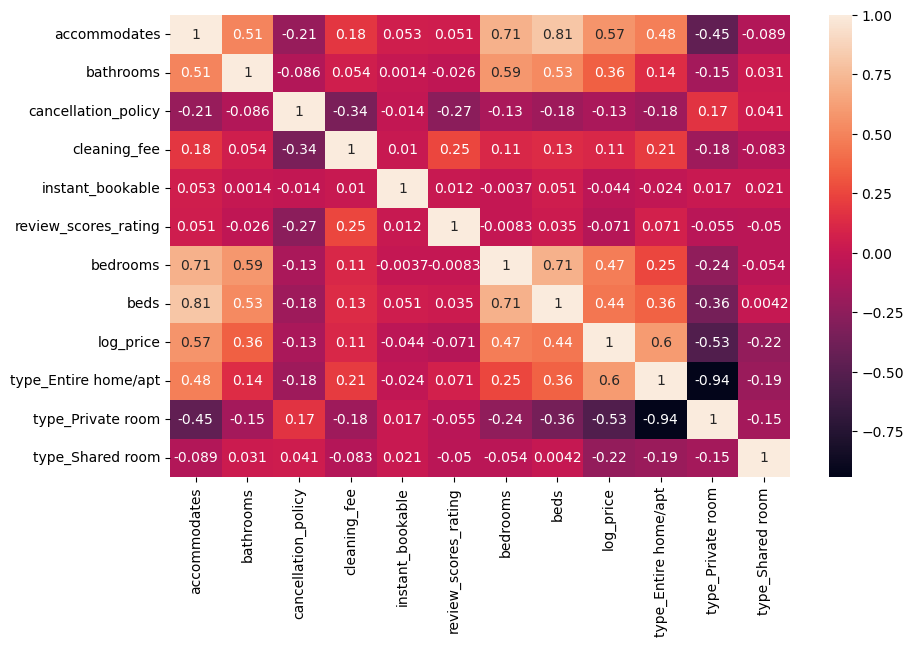

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<Axes: >

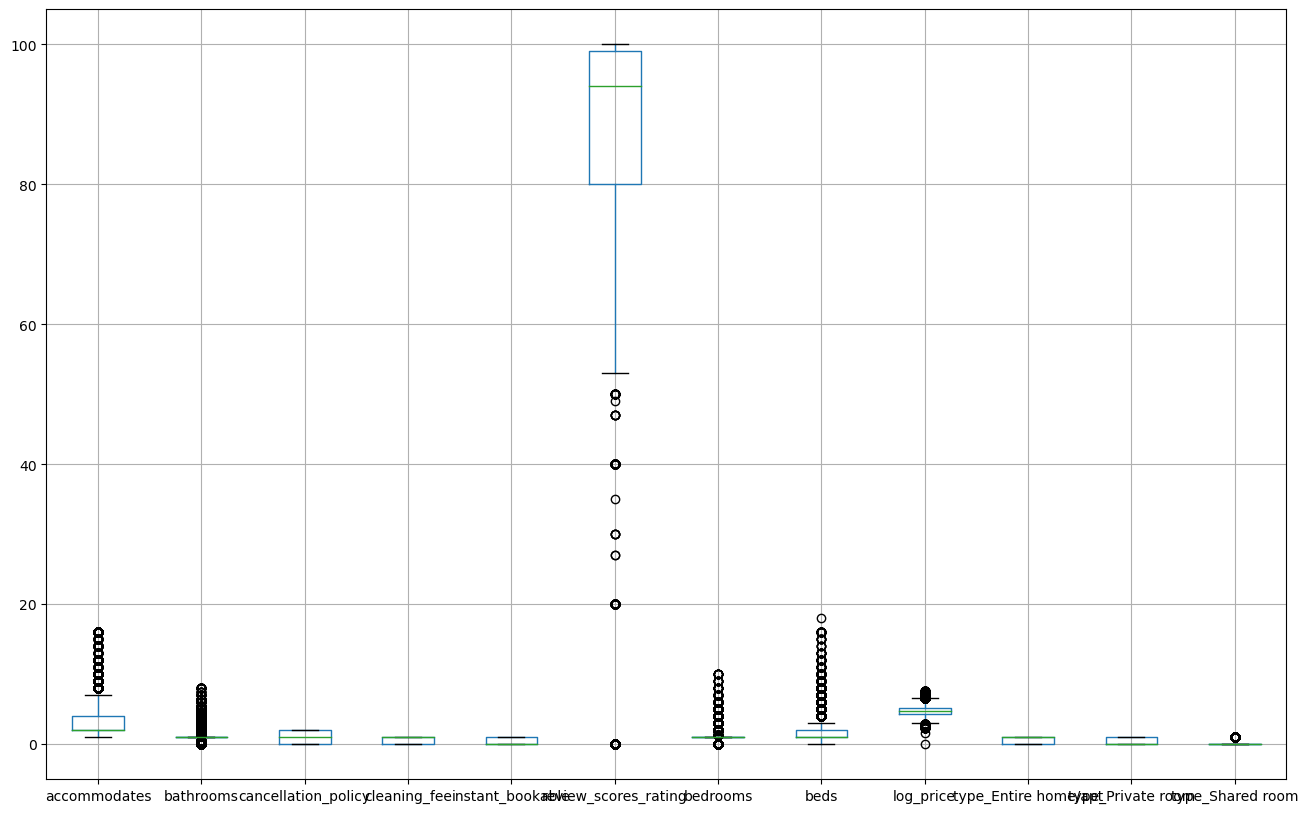

In [92]:
plt.figure(figsize=(16,10))
df.boxplot()

In [33]:
# saving it just for another use
df = df.to_csv('airbnb1')

In [93]:
df.head()

,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,type_Entire home/apt,type_Private room,type_Shared room
0,3.0,1.0,0,1,0,100.0,1.0,1.0,5.010635,1,0,0
1,7.0,1.0,0,1,1,93.0,3.0,3.0,5.129899,1,0,0
2,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734,1,0,0
3,4.0,1.0,2,1,0,0.0,2.0,2.0,6.620073,1,0,0
4,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932,1,0,0


In [94]:
#to remove the outliers 
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    IQR = q3-q1
    
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    
    outliers = (df[column]<lower) | (df[column]>upper)
    
cleaned_df= df[~outliers]
    


In [95]:
cleaned_df.head()

,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,type_Entire home/apt,type_Private room,type_Shared room
0,3.0,1.0,0,1,0,100.0,1.0,1.0,5.010635,1,0,0
1,7.0,1.0,0,1,1,93.0,3.0,3.0,5.129899,1,0,0
2,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734,1,0,0
3,4.0,1.0,2,1,0,0.0,2.0,2.0,6.620073,1,0,0
4,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932,1,0,0


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
X = cleaned_df.drop('log_price',axis=1)

y = cleaned_df[['log_price']]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [101]:
regression_model = LinearRegression()

In [102]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [103]:
regression_model.score(X_train,y_train)

0.5171152917579906

In [104]:
regression_model.score(X_test,y_test)

0.508748379734569

In [110]:
regression_model.intercept_[0]


4.407678147178118

In [111]:
regression_model.coef_

array([[ 0.07814543,  0.18484302, -0.01783963, -0.04813001, -0.05521028,
        -0.00194687,  0.12522118, -0.04288334,  0.32373512, -0.32373512,
         0.        ]])